# **Lab 10:**
# Simulation and Modeling for Crop Cultivation and Weather Patterns **bold text**


# Step 1: Generate the Synthetic **Dataset**

In [1]:


import pandas as pd
import numpy as np

np.random.seed(42)
n_samples = 1000
n_features = 100

feature_data = {}

for i in range(n_features):
    if i < 20:
        feature_data[f"temp_feature_{i}"] = np.random.uniform(15, 35, n_samples)
    elif i < 40:
        feature_data[f"rain_feature_{i}"] = np.random.uniform(100, 1200, n_samples)
    elif i < 60:
        feature_data[f"humidity_feature_{i}"] = np.random.uniform(20, 90, n_samples)
    elif i < 80:
        feature_data[f"soil_feature_{i}"] = np.random.uniform(0.3, 1.0, n_samples)
    else:
        feature_data[f"misc_feature_{i}"] = np.random.normal(0, 1, n_samples)

df = pd.DataFrame(feature_data)


weights = np.random.uniform(-1, 1, n_features)
df['crop_yield'] = df.dot(weights) + np.random.normal(0, 5, n_samples)


df.to_csv("synthetic_crop_data.csv", index=False)
print("✅ Dataset generated and saved as 'synthetic_crop_data.csv'")


✅ Dataset generated and saved as 'synthetic_crop_data.csv'


# **Step 2: Model Training Script**

In [2]:
!pip install pandas scikit-learn xgboost joblib

## **Step 3: Training Model**

🔍 Training models and evaluating performance...

Random Forest: R² = -0.0541, RMSE = 1027.4318
Gradient Boosting: R² = -0.0608, RMSE = 1030.6682
XGBoost: R² = -0.1691, RMSE = 1081.9998

✅ Best model: Random Forest saved as 'best_crop_yield_model.pkl'


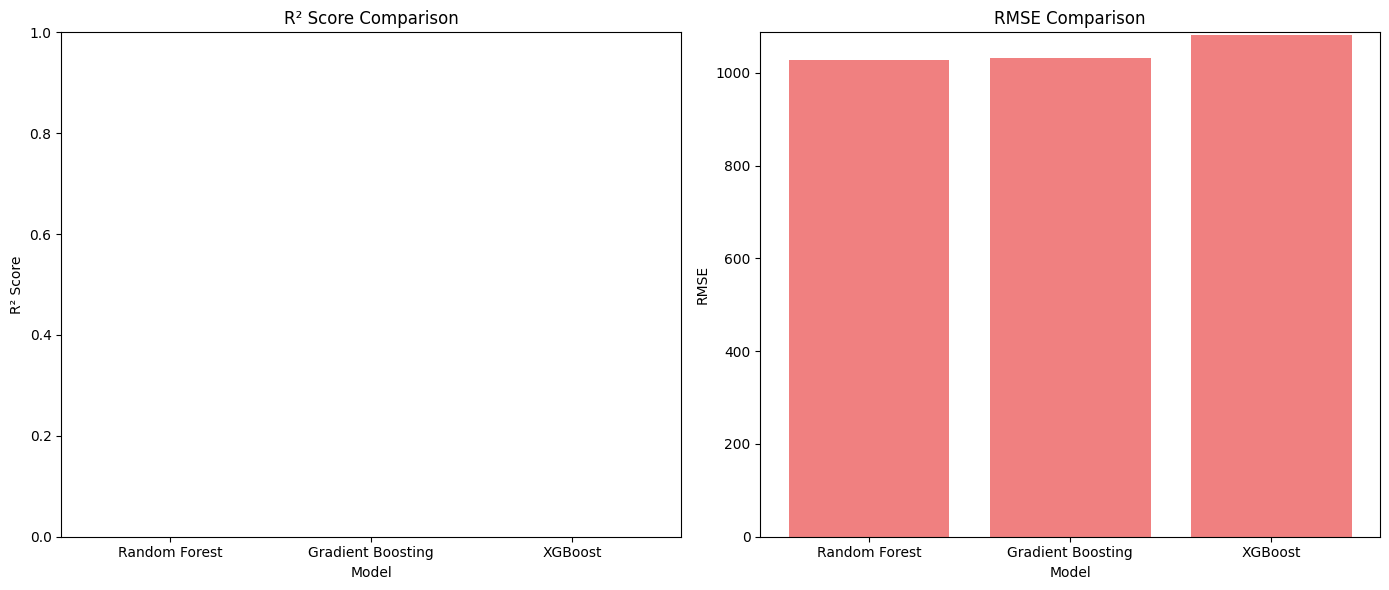

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


df = pd.read_csv("/content/synthetic_crop_data.csv")


X = df[[
    'humidity_feature_40', 'temp_feature_0', 'rain_feature_20', 'soil_feature_60', 'misc_feature_80'
]]
y = df['crop_yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
}

results = {}

print("🔍 Training models and evaluating performance...\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = (r2, rmse)
    print(f"{name}: R² = {r2:.4f}, RMSE = {rmse:.4f}")

#select best model
best_model_name = max(results, key=lambda k: results[k][0])
best_model = models[best_model_name]


joblib.dump(best_model, "best_crop_yield_model.pkl")
print(f"\n✅ Best model: {best_model_name} saved as 'best_crop_yield_model.pkl'")

#plotting the comparison graph for R² and RMSE values
model_names = list(results.keys())
r2_scores = [results[name][0] for name in model_names]
rmse_scores = [results[name][1] for name in model_names]


fig, ax = plt.subplots(1, 2, figsize=(14, 6))

#R² Score Bar Plot
ax[0].bar(model_names, r2_scores, color='skyblue')
ax[0].set_title('R² Score Comparison')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('R² Score')
ax[0].set_ylim(0, 1)

#RMSE Bar Plot
ax[1].bar(model_names, rmse_scores, color='lightcoral')
ax[1].set_title('RMSE Comparison')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('RMSE')
ax[1].set_ylim(0, max(rmse_scores) + 5)


plt.tight_layout()
plt.show()


In [11]:
!pip install pdf2image

In [12]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 0s (886 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126213 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.6_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.6) ...
Setting up poppler-utils (22.02.0-2ubuntu0.6) ...
Processing triggers for man-db (2.10.2-1) ...


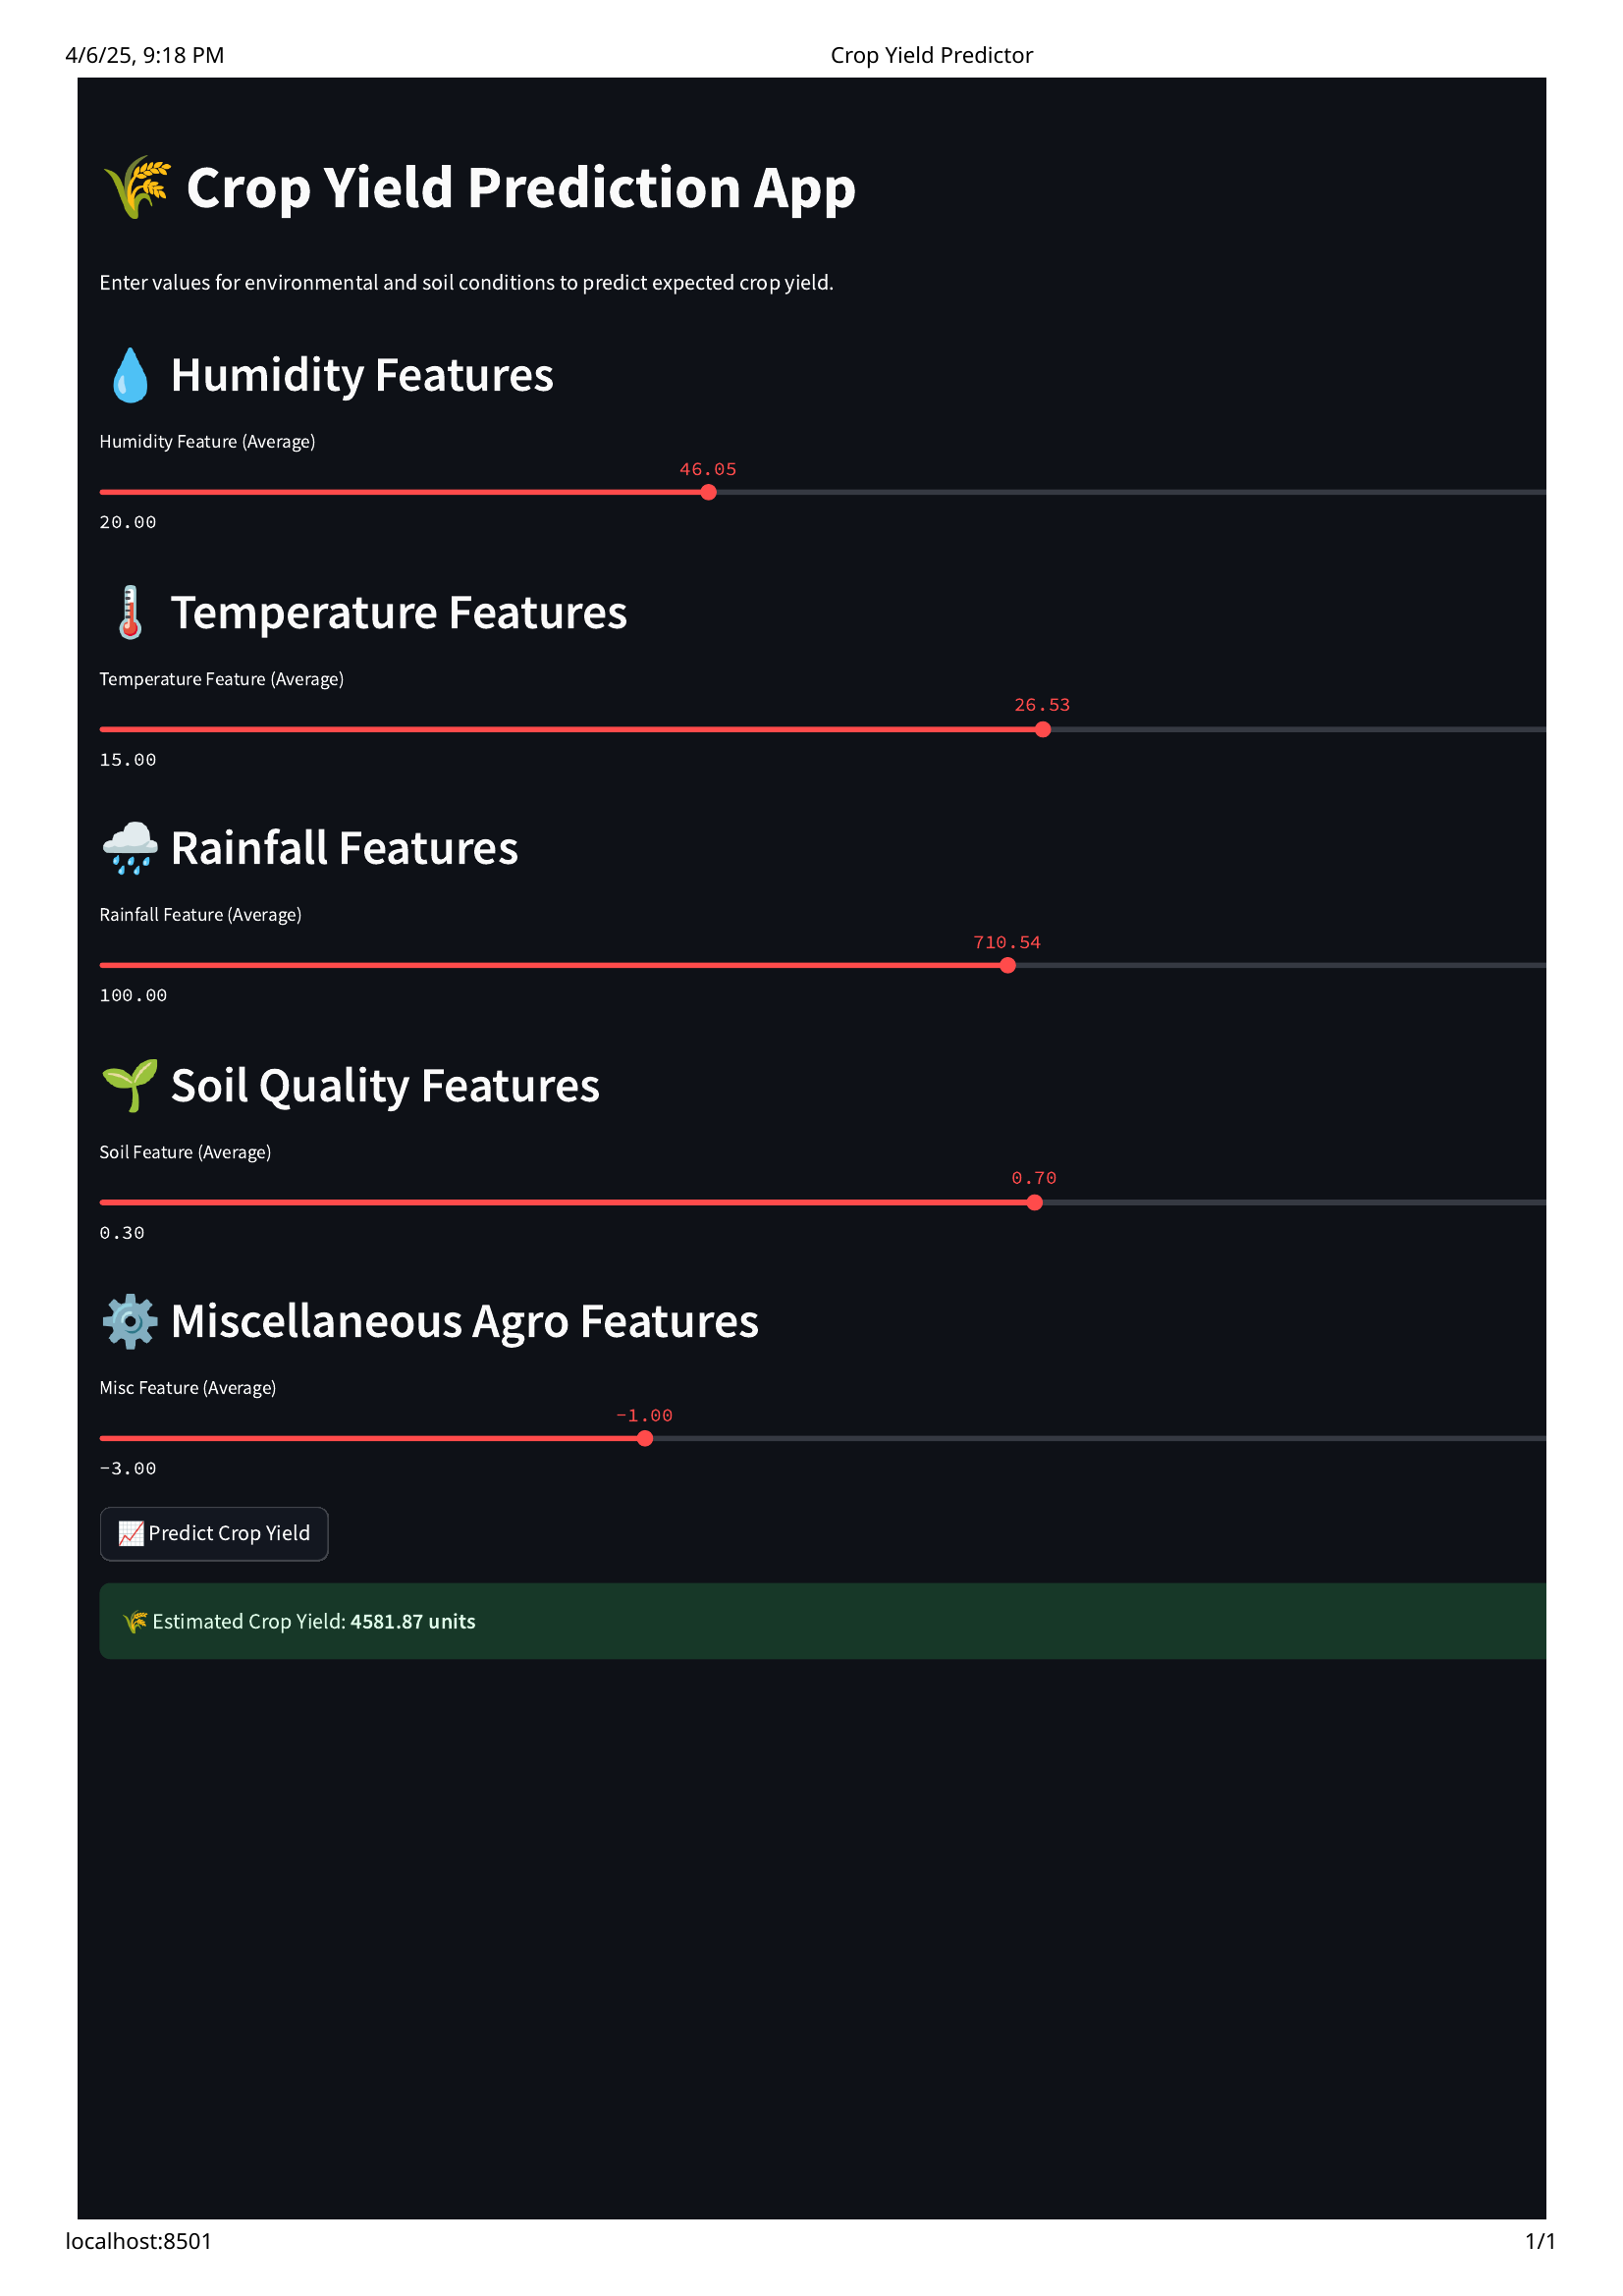

In [13]:
from pdf2image import convert_from_path
from IPython.display import Image, display

pdf_path = '/content/Crop Yield Predictor.pdf'

images = convert_from_path(pdf_path)

images[0].show()

images[0].save('page_1.png', 'PNG')
display(Image(filename='page_1.png'))
